In [25]:
%matplotlib inline
import os

from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

In [49]:
data_path = '../data/coco128'
data_type = 'train2017'
ann_path = '{}/annotations/instances_{}.json'.format(data_path, data_type)
img_path = '{}/images/{}'.format(data_path, data_type)

def get_img_path(img_id):
    return os.path.join(img_path, '/{:012d}.jpg'.format(img_id))

In [29]:
coco = COCO(ann_path)

loading annotations into memory...
Done (t=9.09s)
creating index...
index created!


In [30]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
animal vehicle indoor person accessory appliance outdoor food sports furniture electronic kitchen


In [53]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=nms)
print(f'{catIds=}')
imgIds = coco.getImgIds(catIds=catIds)
print(f'{imgIds[:10]=}')

valid_imgIds = [imgId for imgId in imgIds if os.path.exists(get_img_path(imgId))]
print(f'{valid_imgIds[:10]=}')

catIds=[1]
imgIds[:10]=[262145, 262146, 524291, 262148, 393223, 393224, 524297, 393227, 131084, 393230]
valid_imgIds[:10]=[36, 49, 61, 74, 77, 86, 109, 110, 113, 127]


img={'license': 1, 'file_name': '000000000109.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000000109.jpg', 'height': 416, 'width': 640, 'date_captured': '2013-11-22 08:45:41', 'flickr_url': 'http://farm8.staticflickr.com/7310/8716244332_8c77779378_z.jpg', 'id': 109}


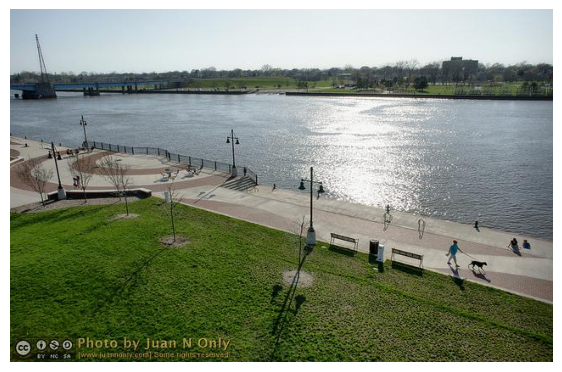

In [56]:
plt.figure(figsize=(7, 7))
# plot image: 322
imgId = 109
img = coco.loadImgs(imgId)[0]
print(f'{img=}')
I = io.imread(os.path.join(data_path, 'images', data_type, img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

annIds=[189352, 190838, 197534, 1239923, 2151449]
anns=[{'segmentation': [[514.61, 298.98, 517.05, 295.11, 518.2, 291.23, 517.91, 289.65, 515.33, 292.67, 514.75, 291.66, 512.89, 291.23, 513.03, 289.65, 514.32, 287.93, 516.47, 287.93, 516.47, 283.62, 519.78, 278.03, 521.93, 275.73, 521.78, 272.57, 522.79, 271.42, 525.66, 272.28, 526.95, 273.15, 527.67, 274.87, 526.95, 277.6, 528.67, 280.04, 529.1, 281.04, 534.13, 285.92, 532.98, 287.79, 528.24, 283.34, 525.8, 288.36, 525.8, 289.79, 526.52, 292.09, 527.38, 300.99, 530.25, 302.57, 530.11, 304.15, 524.51, 304.0, 524.51, 300.7, 522.93, 298.84, 521.78, 293.38, 518.77, 295.97, 518.34, 297.54, 521.5, 300.7, 520.21, 301.42, 514.46, 300.27]], 'area': 290.2648999999999, 'iscrowd': 0, 'image_id': 109, 'bbox': [512.89, 271.42, 21.24, 32.73], 'category_id': 1, 'id': 189352}, {'segmentation': [[597.48, 271.64, 597.6, 273.84, 598.33, 277.5, 598.94, 279.09, 599.8, 285.07, 603.22, 288.73, 604.07, 290.56, 601.02, 291.17, 600.04, 290.19, 595.04, 287.27, 5

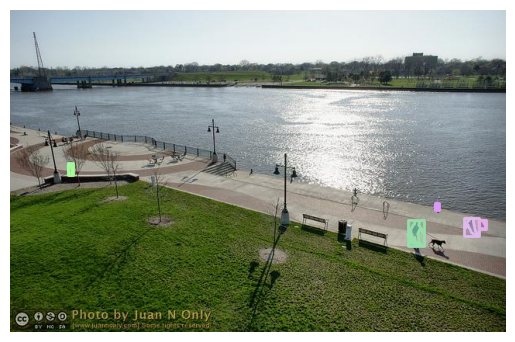

In [57]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print(f'{annIds=}')
anns = coco.loadAnns(annIds)
print(f'{anns=}')
coco.showAnns(anns, draw_bbox=True)